## Linear_Regression_Boston_DataSet

Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
boston.data.shape

(506, 13)

In [6]:
boston.target.shape

(506,)

In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [9]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [10]:
bos["MEDV"] = boston.target

In [11]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
bos.shape

(506, 14)

In [13]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [14]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
bos.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [16]:
X = bos.iloc[:,:-1]
Y = bos.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# model evaluation for training set
y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("RMSE: ",rmse)
print("R2 Score: ",r2)

RMSE:  4.741000992236517
R2 Score:  0.7383393920590519


In [20]:
# model evaluation for testing set
y_test_predict = lm.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("RMSE: ",rmse)
print("R2 Score: ",r2)

RMSE:  4.568292042303176
R2 Score:  0.7334492147453113


In [21]:
lm.intercept_

37.91248700975083

In [22]:
lm.coef_

array([-1.30799852e-01,  4.94030235e-02,  1.09535045e-03,  2.70536624e+00,
       -1.59570504e+01,  3.41397332e+00,  1.11887670e-03, -1.49308124e+00,
        3.64422378e-01, -1.31718155e-02, -9.52369666e-01,  1.17492092e-02,
       -5.94076089e-01])

In [23]:
#Dataframe consisting of feature and coefficients
feat_coeff= pd.DataFrame({'features':X.columns,'estimated cofficients':lm.coef_})
#feat_coeff.columns = ['features','estimated coefficients']
feat_coeff.head(15)

,features,estimated cofficients
0,CRIM,-0.130800
1,ZN,0.049403
2,INDUS,0.001095
3,CHAS,2.705366
4,NOX,-15.957050
5,RM,3.413973
6,AGE,0.001119
7,DIS,-1.493081
8,RAD,0.364422
9,TAX,-0.013172


Text(0.5,1,'Predicted price vs actual price')

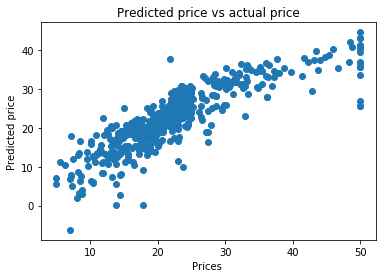

In [24]:
plt.scatter(Y,lm.predict(X))
plt.xlabel("Prices ")
plt.ylabel("Predicted price")
plt.title("Predicted price vs actual price")

In [25]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, Y_train)

print('Training score: {}'.format(pipeline.score(X_train, Y_train)))
print('Test score: {}'.format(pipeline.score(X_test, Y_test)))

Training score: 0.9315330398254167
Test score: 0.8698727238106457


### L1 Regularization or Lasso Regression

In [26]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X_train, Y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, Y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test, Y_test)))

Training score: 0.845202188401831
Test score: 0.8405777020264105


### L2 Regularization or Ridge Regression

In [27]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, Y_train)

print('Training Score: {}'.format(ridge_pipe.score(X_train, Y_train)))
print('Test Score: {}'.format(ridge_pipe.score(X_test, Y_test)))

Training Score: 0.9177563678285172
Test Score: 0.8974786517325353
